# Dependencia e Independencia estadística.

**Ximena Fernández**

Entre dos variables o atributos puede ocurrir que exista **independencia**, **dependencia funcional** (matemática) o **dependencia estadística**. Por ejemplo:

- _Altura_ y _alquiler mensual_ (independencia)

- _Minutos de llamadas_ y _valor de la factura mensual_ (dependencia funcional o matemática).

- _Grado de involucramiento en Política_ y _Corrupción_, _Peso_ y _Altura_ de un grupo de personas de una misma población (dependencia estadística).


**Definición.** Dos variables aleatorias $X$ e $Y$ se dicen **independientes** si para todo $a,b,c,d \in \mathrm{R}$ se tiene que:
$$P(a<X<b, c<Y<d) = P(a<X<b) \cdot P(c<Y<d)$$
- Si $X$, $Y$ son discretas, $X$, $Y$ son independientes si y sólo si $p_{XY}(x,y) = p_X(x)p_Y(y)$.
- Si $X$, $Y$ son continuas, $X$, $Y$ son independientes si $f_{XY}(x,y) = f_X(x)f_Y(y)$.


### Covarianza

**Definición.** Dadas dos variables aleatorias $X$ e $Y$, se define  la covarianza entre $X$ e $Y$ como:

$cov(X, Y) = E((X-\mu_X)(Y-\mu_Y))$.

Equivalentemente, $cov(X, Y) = E(XY)-E(X)E(Y)$.

La covarianza cuantifica el grado de **relación lineal** entre las variables y el sentido de esta, de la forma:

- $cov(X, Y)>0$, relación lineal positiva (si crece una variable, la otra también)

- $cov(X, Y)<0$, relación lineal negativa (si crece una variable, la otra decrece)

- $cov(X, Y)=0$, no hay relación lineal entre las variables.

**Propiedad** Si $X, Y$ son independientes, entonces $cov(X,Y) = 0$. Equivalentemente, si $cov(X, Y)\neq 0$, entonces $X,Y$ son dependientes.

**OJO! No vale la recíproca.** Si $cov(X, Y) = 0$, $X, Y$ pueden ser dependientes o independientes.

### Coeficiente de correlación

El número que resulte el cálculo de la covarianza es de dificil interpretación, puesto que depende de las unidades en que vengan expresadas las variables. Es por eso que, en vez de trabajar con la covarianza, se trabaja con el llamado coeficiente de correlación lineal (o coeficiente de correlación lineal de Pearson).

**Definición.** Dadas dos variables aleatorias $X$ e $Y$, se define el coeficiente de correlación como: 
$\rho_{XY} = \frac{cov(X,Y)}{\rho_X \rho_Y}$

![title](corr.png)

### Ejemplo 1
Dentro de la librería HSAUR podemos encontrar el conjunto de datos water, correspondiente a la mortalidad y dureza del agua en 61 ciudades de Inglaterra y Gales durante los años 1958 a 1964. Se trata de 61 observaciones de 4 variables: location (un factor con niveles North y South), town con el nombre de la ciudad, X correspondiente a la mortalidad (mortalidad anual media por cada 100.000 varones) e Y correspondiente a la dureza del agua (concentración de calcio en partes por millón) (Hand et al. 1993). 

In [5]:
library(HSAUR)
data("water", package = "HSAUR")
mort<-data.frame(water)
head(mort)

Loading required package: tools



,location,town,mortality,hardness
,<fct>,<chr>,<int>,<int>
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
6,North,Bolton,1558,10


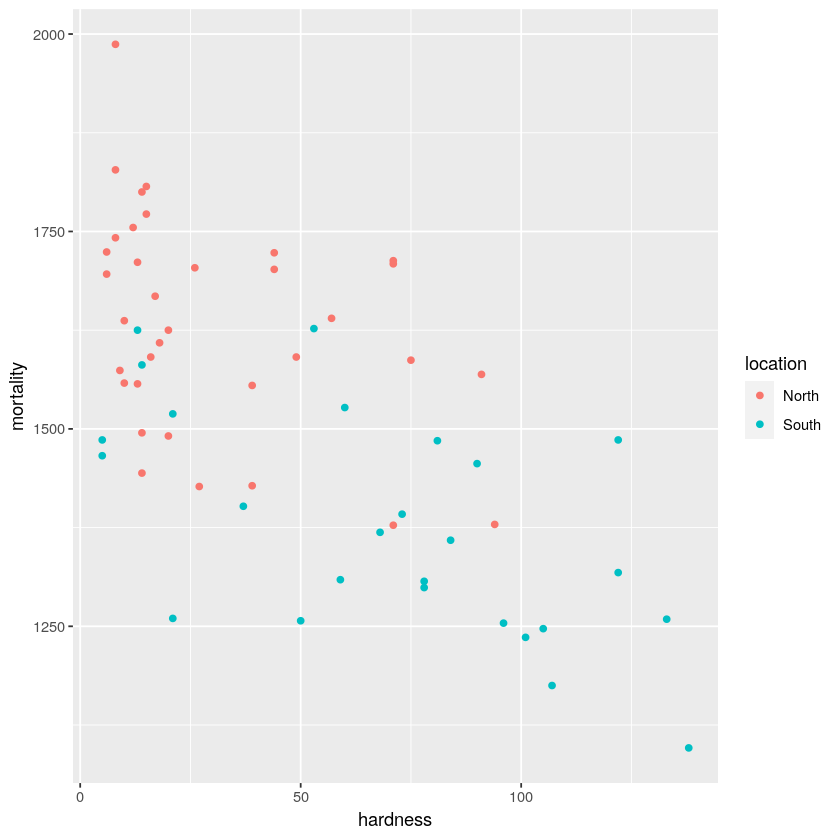

In [6]:
library(ggplot2)
ggplot()+
  geom_point(data=mort, 
              aes(x=hardness, y=mortality, colour=location))

La estructura de la nube de puntos deja entrever que, a mayor dureza del agua (mayor concentración de calcio), la mortalidad disminuye. Es una relación lineal decreciente.

In [7]:
cov(mort$hardness, mort$mortality)

[1] -4681.544

In [8]:
cor(mort$hardness, mort$mortality)

[1] -0.6548486

Matemáticamente, la variable Y puede expresarse en función de X como una línea recta a través de una función del tipo $Y=a+bX$ 

Esta recta se llama recta de regresión, y sirve para predecir el valor de Y para un valor nuevo de la variable X.
La forma de calcular los mejores valores para $a$
y $b$ es:

 $$b=\frac{\rho_{XY}}{(\sigma_X)^2}, ~~ a=\mu_Y-b\mu_X$$

In [12]:
linea<-lm(hardness~ mortality, data = mort)                     
linea


Call:
lm(formula = hardness ~ mortality, data = mort)

Coefficients:
(Intercept)    mortality  
   249.7769      -0.1329  


`geom_smooth()` using formula 'y ~ x'



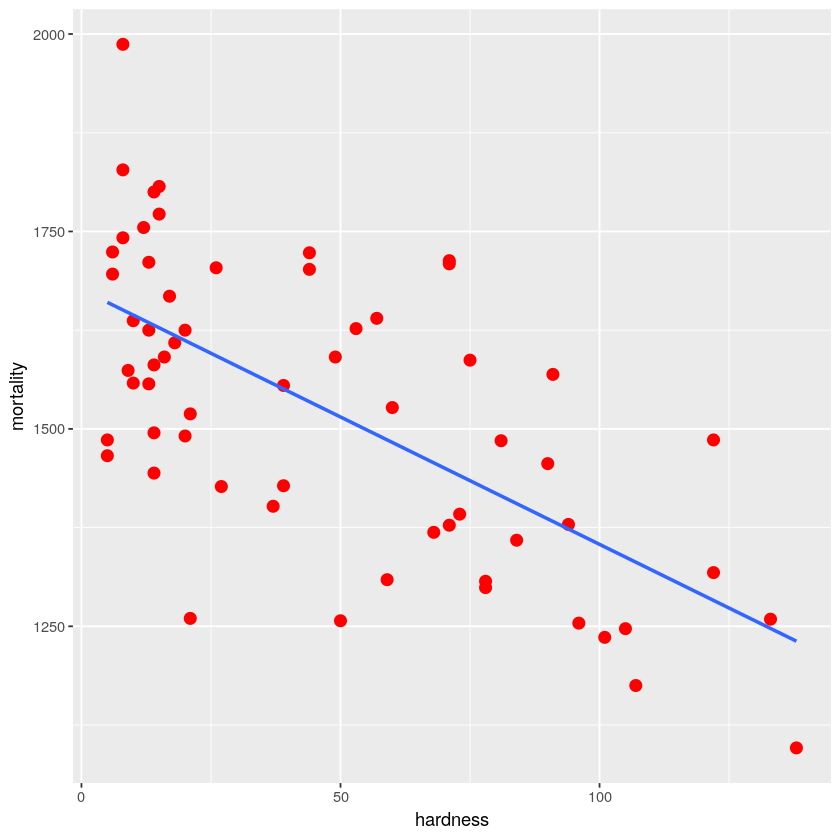

In [20]:
ggplot(data=mort, 
           aes(x=hardness,y=mortality),color="red",size=3)+
           geom_point(color="red", size=3)+ 
           geom_smooth(method = "lm", se=FALSE)

### Ejemplo 2

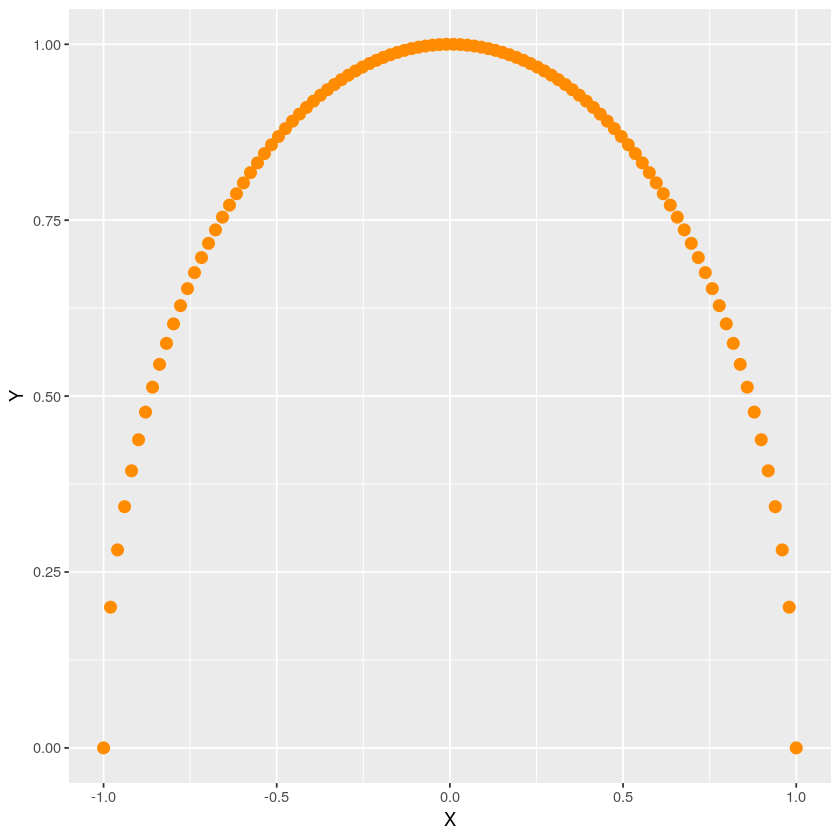

In [9]:
# 100 puntos desde -1 a 1 
X=seq(-1,1,length=100)
# ecuación de una semi-circunferencia
Y=sqrt(1-X^2)  
xy=data.frame(X,Y)
ggplot(data=xy, aes(x=X,y=Y))+
  geom_point(color="darkorange", size=3) 

In [23]:
cor(X,Y)

[1] -3.162392e-16

### Correlación $\neq$ causalidad

Algunos ejemplos tomados de la literatura estadística (resumidos en Wikipedia) dan idea de errores comunes y detalles que cualquier investigador debe considerar siempre que relacione dos variables. Los siguientes son ejemplos de conclusiones erróneas obtenidas de una mala interpretación de la correlación entre dos variables.



- _Dormir sin quitarse los zapatos tiene una alta correlación con despertarse con dolor de cabeza. Por lo tanto, el dormir con los zapatos puestos ocasiona levantarse con dolor de cabeza._

Este resultado mezcla los conceptos de correlación y causalidad, porque concluye que dormir con los zapatos puestos provoca dolor de cabeza al levantarse. Hay un tercer factor que no se ha tenido en cuenta, que es que irse borracho a la cama provoca ambos efectos: no poder ni quitarse los zapatos y levantarse mareado.

- _Los niños pequeños que duermen con la luz encendida son mucho más propensos a desarrollar miopía en la edad adulta._ 

Esta fue la conclusión de un estudio de la Universidad de Pennsylvania, publicado en 1999 en la revista Nature. Un estudio posterior de la Ohio State University refutó esta teoría, y encontró una fuerte relación entre la miopía de los padres y el desarrollo de la miopía infantil, advirtiendo que los padres miopes tenían más probabilidades de dejar una luz encendida en el dormitorio de sus hijos. De nuevo una tercera variable no tenida en cuenta (la miopia de los padres), causaba la alta correlación entre las otras dos variables relacionadas.

- _Cuando aumentan las ventas de helado, la tasa de muertes por ahogamiento también aumenta. Por lo tanto, el consumo de helado provoca ahogamiento._

El helado se vende durante los meses de verano a un ritmo mucho mayor que en épocas más frías, y es durante estos meses de verano que las personas son más propensas a participar en actividades relacionadas con el agua, como la natación. El mayor porcentaje de muertes por ahogamiento es causado por una mayor exposición a las actividades acuáticas.

- _Desde 1950, tanto el nivel de dióxido de carbono (CO2) en la atmósfera como los niveles de obesidad han aumentado considerablemente. Por lo tanto, el CO2 atmosférico provoca la obesidad._

Obviamente, en las ciudades que han mejorado su nivel de vida a partir de los años 50, se come más y se expulsa más CO2 a la atmósfera (coches, fábricas… ).
